In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline

plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [4]:
df_red = pd.read_csv("winequality-red.csv")

df_white = pd.read_csv("winequality_white.csv")

In [5]:
df_red["color"] = "R"
df_white["color"] = "W"
df_all=pd.concat([df_red,df_white],axis=0)
df_all.head()


,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality""",color
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5,R
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5,R
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...,R
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...,R
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5,R


In [6]:
df_white.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
df_red.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
df_all.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [7]:
df_all.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality""",color
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5,R
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5,R
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...,R
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...,R
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5,R


In [8]:
df_all.isnull().sum()

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    0
color                                                                                                                                                                      0
dtype: int64

In [9]:
df_all.describe()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality""",color
count,6497,6497
unique,5318,2
top,7;0.15;0.28;14.7;0.051;29;149;0.99792;2.96;0.3...,W
freq,8,4898


In [10]:
df_all.dropna()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality""",color
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5,R
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5,R
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...,R
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...,R
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5,R
5,7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5,R
6,7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9...,R
7,7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7,R
8,7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7,R
9,7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;...,R


In [11]:
df_r_corr=df_red.corr()
df_w_corr=df_white.corr()

In [12]:
df_r_corr

""


In [13]:
df_w_corr

""


In [36]:
diff_corr = df_r_corr - df_w_corr

NameError: name 'diff_corr' is not defined

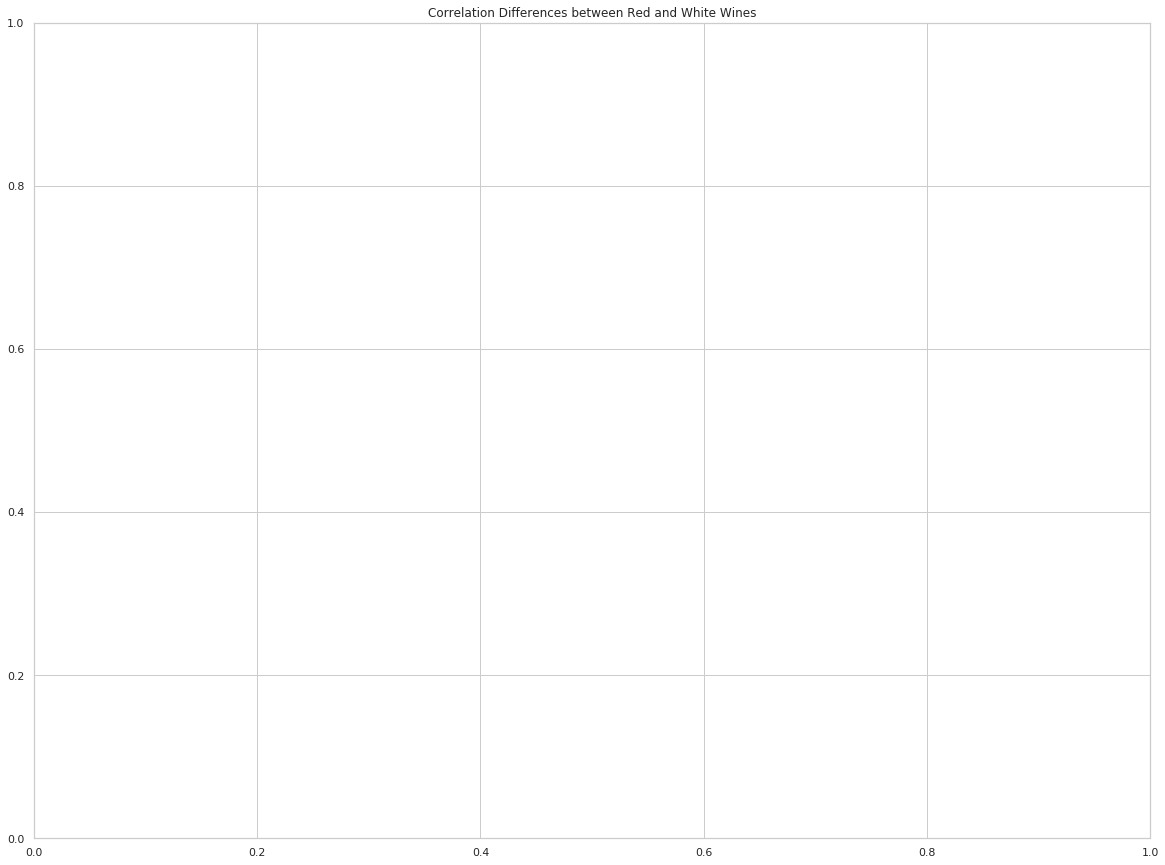

In [14]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Differences between Red and White Wines")
corr = diff_corr
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="coolwarm")

In [38]:
print("white mean = ",df_white["quality"].mean())
print("red mean =",df_red["quality"].mean())

white mean =  5.87790935075541
red mean = 5.6360225140712945


In [39]:
d = {'color': ['red','white'], 'mean_quality': [5.636023,5.877909]}
df_mean = pd.DataFrame(data=d)
df_mean

,color,mean_quality
0,red,5.636023
1,white,5.877909


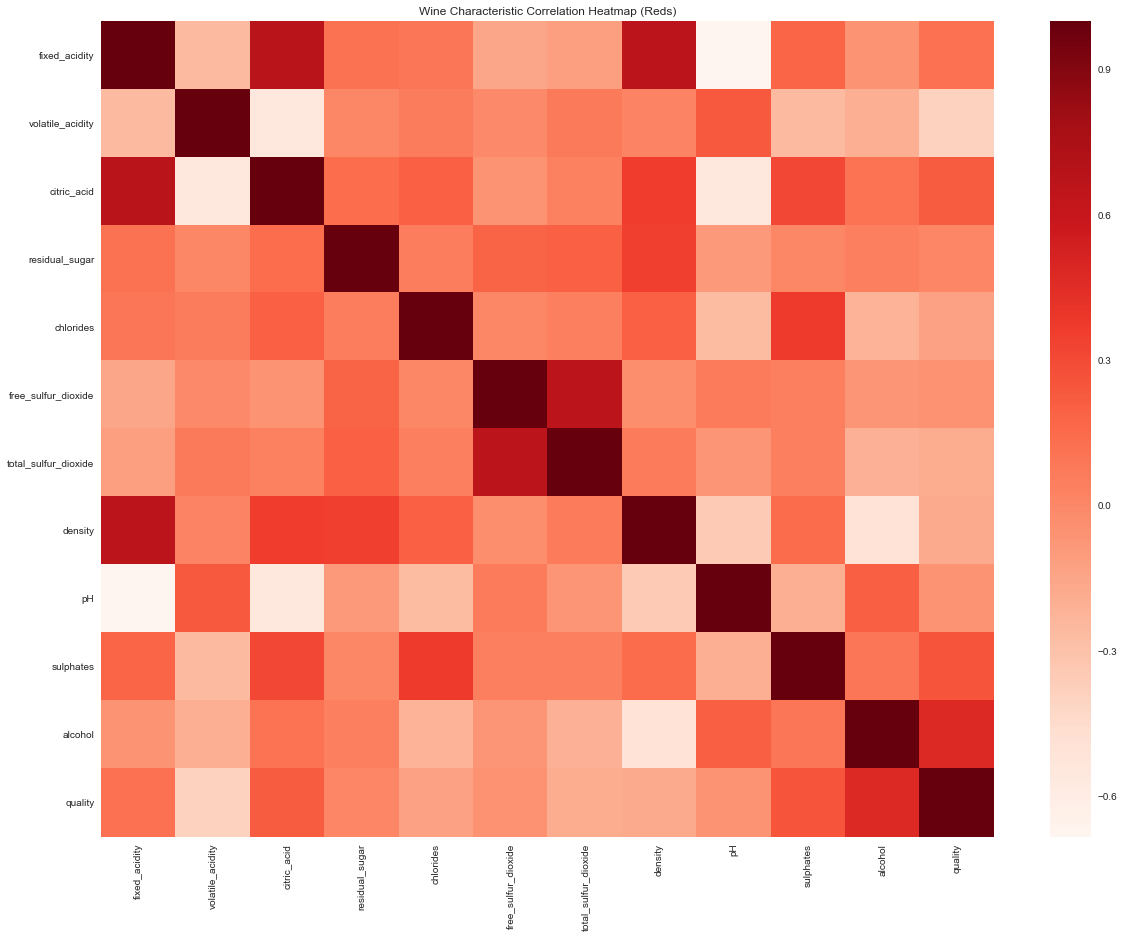

In [40]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Wine Characteristic Correlation Heatmap (Reds)")
corr = df_red.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Reds")
plt.show()

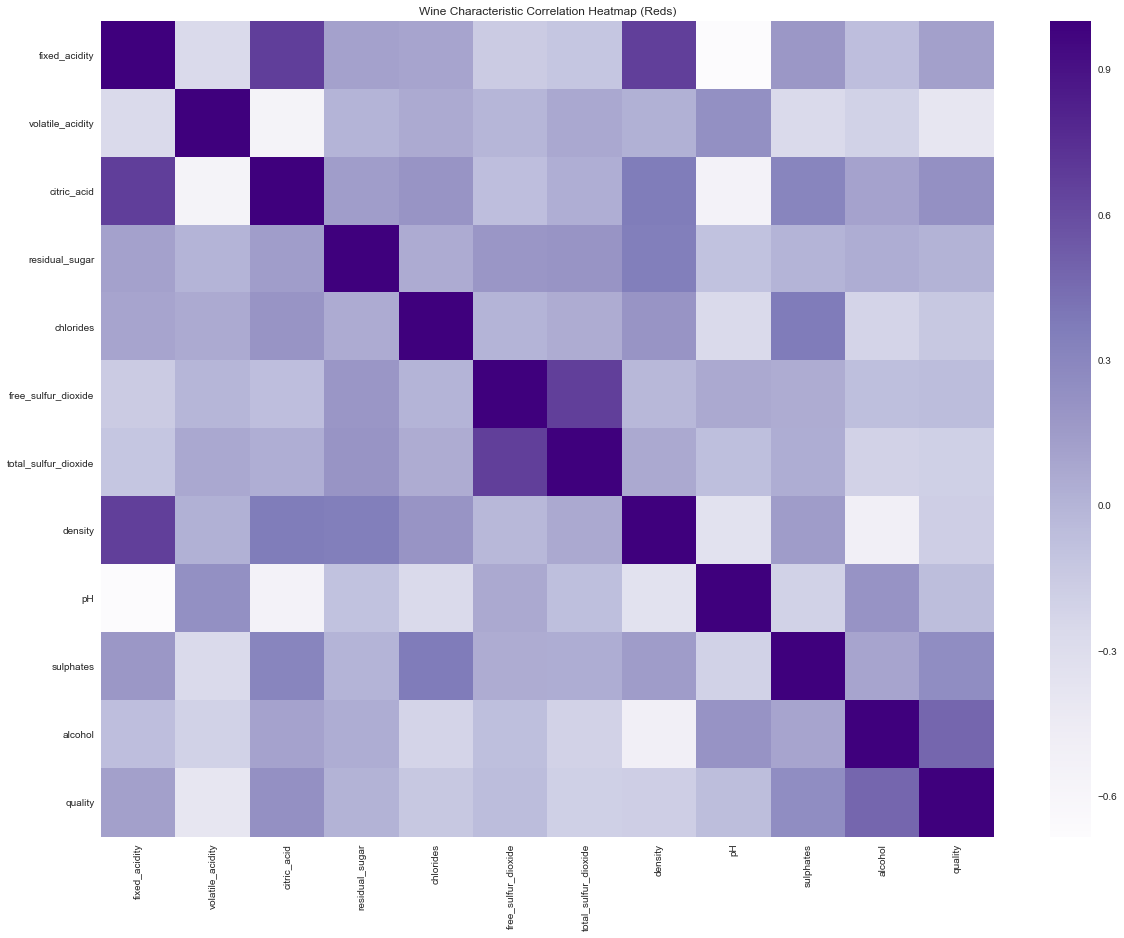

In [41]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Wine Characteristic Correlation Heatmap (Reds)")
corr = df_red.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Purples")